In [46]:
import numpy as np
import pandas as pd
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

In [47]:
drug_data=pd.read_csv('drug200.csv',delimiter=',')
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [48]:
drug_data.shape

(200, 6)

In [49]:
from sklearn import preprocessing
import pandas as pd
le=preprocessing.LabelEncoder()
drug_data['Sex']=le.fit_transform(drug_data.Sex.values)
drug_data['BP']=le.fit_transform(drug_data.BP.values)
drug_data['Cholesterol']=le.fit_transform(drug_data.Cholesterol.values)

In [50]:
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [51]:
drug_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Text(0, 0.5, 'Na_to_K')

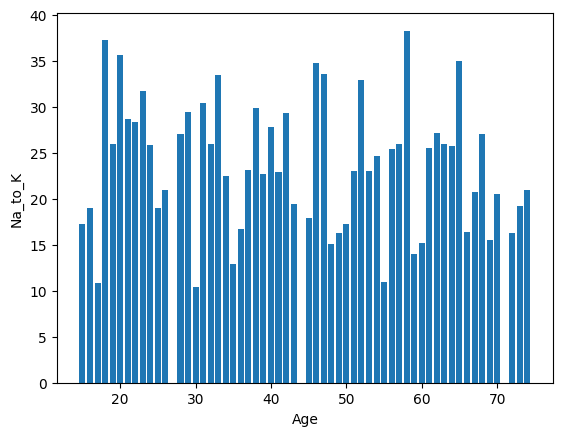

In [52]:
import matplotlib.pyplot as plt
plt.bar(drug_data['Age'],drug_data['Na_to_K'])
plt.xlabel('Age')
plt.ylabel("Na_to_K")

Text(0, 0.5, 'Na_to_K')

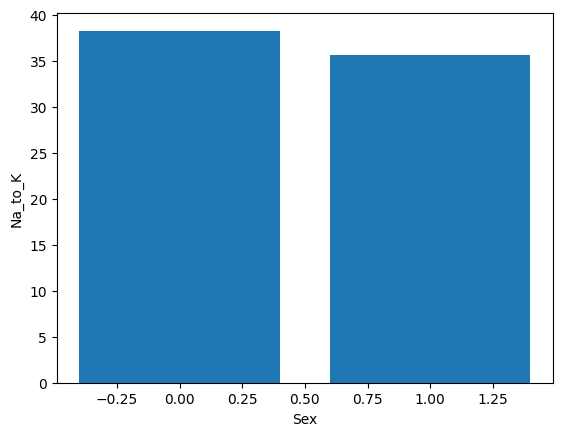

In [53]:
import matplotlib.pyplot as plt
plt.bar(drug_data['Sex'],drug_data['Na_to_K'])
plt.xlabel('Sex')
plt.ylabel("Na_to_K")

Text(0, 0.5, 'Na_to_K')

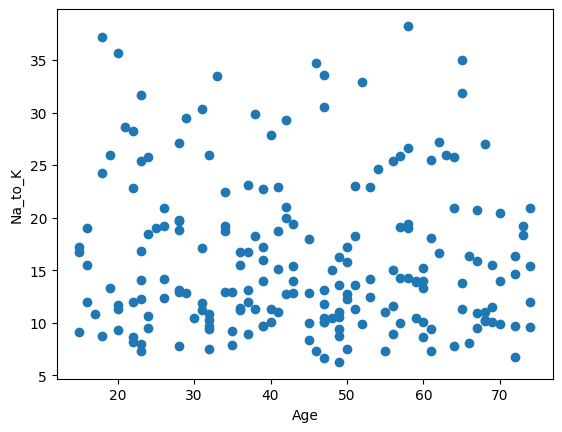

In [54]:
plt.scatter(drug_data['Age'],drug_data['Na_to_K'])
plt.xlabel('Age')
plt.ylabel("Na_to_K")

In [69]:
correlation=drug_data.drop(columns='Drug')
correlation=correlation.corr()
correlation['Na_to_K'].sort_values(ascending=False)

Na_to_K        1.000000
Cholesterol    0.010000
Age           -0.063119
Sex           -0.125008
BP            -0.149312
Name: Na_to_K, dtype: float64

<Axes: >

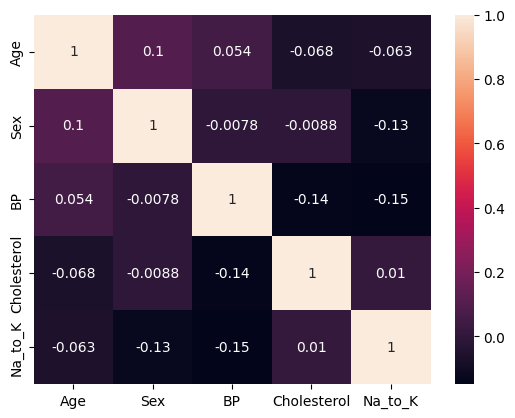

In [68]:
import seaborn as sns

sns.heatmap(correlation,cmap=None,annot=True)

Text(0, 0.5, 'Sex')

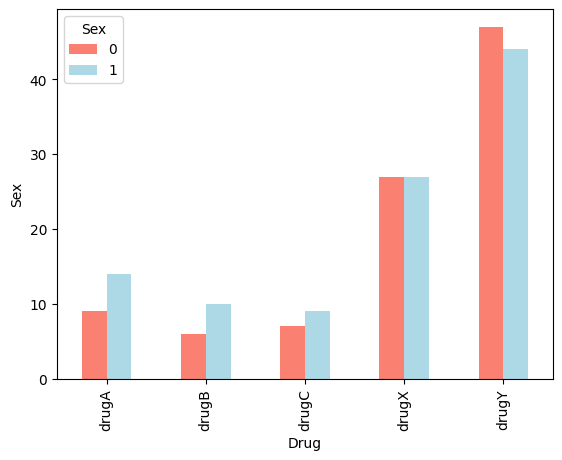

In [70]:
pd.crosstab(drug_data.Drug,drug_data.Sex).plot(kind='bar',color=['salmon','lightblue'])
plt.xlabel('Drug')
plt.ylabel('Sex')

In [55]:
y=drug_data['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [57]:
X_train.shape,y_train.shape

((160, 5), (160,))

In [58]:
X_test.shape,y_test.shape

((40, 5), (40,))

In [59]:
drugTree_model=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [60]:
drugTree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
predict_tree=drugTree_model.predict(X_test)

In [62]:
print(predict_tree[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


In [63]:
print(y_test[0:5])

40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [64]:
from sklearn import metrics
print("DecisionTree's: ",metrics.accuracy_score(y_test,predict_tree))

DecisionTree's:  1.0


<function matplotlib.pyplot.show(close=None, block=None)>

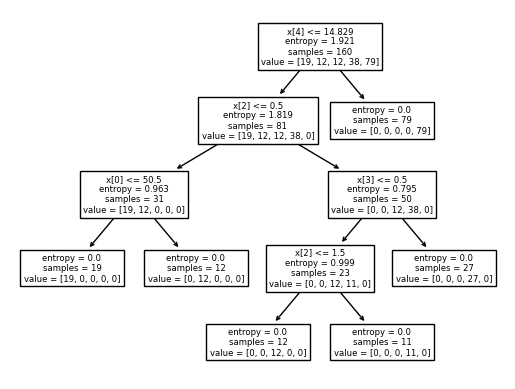

In [65]:
tree.plot_tree(drugTree_model)
plt.show